# Predicting Breast Cancer by modelling on UCI Breast Cancer Dataset

In [1]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree, linear_model, neighbors, svm, naive_bayes
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import scikitplot as sckplt

In [2]:
# setting OS directory
os.chdir('C:\\Users\\rckar\\OneDrive\\Documents\\MSBA\\Fall Semester\\6420 Predictive Analytics\\HW2')

In [3]:
# Reading Data
df = pd.read_csv("wdbc.data", header = None)

In [4]:
# Renaming column names
col_names = ['id','diagnosis',
                 'radius_mean','texture_mean','perimeter_mean','area_mean',
                 'smoothness_mean','compactness_mean','concavity_mean',
                 'concave points_mean','symmetry_mean','fractal_dimension_mean',
                 'radius_se','texture_se','perimeter_se','area_se',
                 'smoothness_se','compactness_se','concavity_se','concave points_se',
                 'symmetry_se','fractal_dimension_se','radius_worst','texture_worst',
                 'perimeter_worst','area_worst','smoothness_worst','compactness_worst',
                 'concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']

df.columns = col_names

In [5]:
# Data pre-processing

# checking for null values
df.isnull().values.any()

False

In [6]:
# Factorizing diagnosis as diagnosis class for modelling purpose
df['diagnosis_class'],class_names = pd.factorize(df['diagnosis'])
print(class_names)
df[['diagnosis','diagnosis_class']].head(n=2)

Index(['M', 'B'], dtype='object')


,diagnosis,diagnosis_class
0,M,0
1,M,0


In [7]:
# Checking for class imbalance
df['diagnosis_class'].value_counts()

1    357
0    212
Name: diagnosis_class, dtype: int64

We do not observe heavy class imbalace in the dataset 

##### Creating the Train and Test data

In [8]:
X_df = df.iloc[:,2:32]
y_df = df.iloc[:,32:]

In [9]:
X_train, X_test_holdout, y_train, y_test_holdout = train_test_split(X_df, y_df, test_size=0.25, 
                                                                    random_state=42, stratify=y_df['diagnosis_class'])

## DECISION TREE

###### Tuning the model using GridSearch Cross Validation to find the values of hyperparameters that best fit the model

In [10]:
# Hyper parameter tuning using GridSearch
param_set ={'max_depth': range(1,20), 'min_samples_split' : range(2,30), 'criterion' : ["gini", "entropy"]}
clf_DTree = tree.DecisionTreeClassifier()
grid_DTree = GridSearchCV(clf_DTree, param_grid = param_set, cv=5, scoring='recall')
grid_DTree.fit(X_train,y_train)

C:\Users\rckar\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 20), 'min_samples_split': range(2, 30), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

##### Examining the best model

In [11]:
# examine the best model

print("Best score achieved across all parameters: ", grid_DTree.best_score_)

# Dictionary containing the parameters used to generate that score
print(" ")
print("Best parameters")
print(grid_DTree.best_params_)

print(" ")
print("Best estimator")
print(grid_DTree.best_estimator_)

Best score achieved across all parameters:  0.9663290715642562
 
Best parameters
{'criterion': 'gini', 'max_depth': 16, 'min_samples_split': 5}
 
Best estimator
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


##### cross - validation with the best hyperparameters

In [12]:
clf_Dtree_best = grid_DTree.best_estimator_

scores = cross_val_score(clf_Dtree_best, X_train, y_train, cv=10)

print("Below are the scores for each model run")
print(scores)

print(" ")
print("Mean Accuracy and variance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Below are the scores for each model run
[0.88372093 0.93023256 0.97674419 0.93023256 0.93023256 0.88372093
 0.97674419 0.88095238 1.         0.92682927]
 
Mean Accuracy and variance: 0.93 (+/- 0.08)


##### Fitting the Train data and Prediction on test data

In [13]:
clf_Dtree_best.fit(X_train,y_train)

y_pred = clf_Dtree_best.predict(X_test_holdout)
print("Decision Tree : accuracy on test data is ",round(accuracy_score(y_test_holdout, y_pred)*100,2),"%")
print(" ")
print("Decision Tree : Confusion Matrix")
print(" ")
print(confusion_matrix(y_test_holdout, y_pred))
print(" ")
print("Decision Tree : Classification Report")
print(classification_report(y_test_holdout, y_pred))

Decision Tree : accuracy on test data is  90.91 %
 
Decision Tree : Confusion Matrix
 
[[48  5]
 [ 8 82]]
 
Decision Tree : Classification Report
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        53
           1       0.94      0.91      0.93        90

   micro avg       0.91      0.91      0.91       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.91      0.91       143



##### ROC curve and Area Under the Curve

C:\Users\rckar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


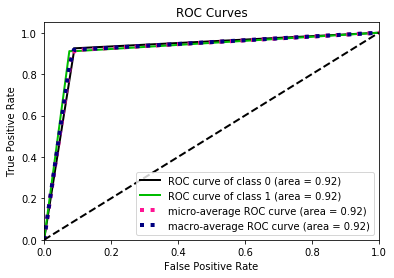

In [14]:
y_probas =  clf_Dtree_best.predict_proba(X_test_holdout) # predicted probabilities generated by classifier
sckplt.metrics.plot_roc_curve(y_test_holdout, y_probas)
plt.show()

##### Lift curve

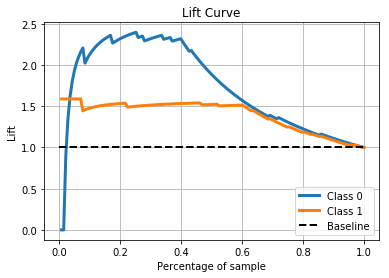

In [15]:
sckplt.metrics.plot_lift_curve(y_test_holdout, y_probas)
plt.show()

## Logistic Regression

###### Tuning the model using GridSearch Cross Validation to find the values of hyperparameters that best fit the model

In [16]:
param_set ={'penalty' : ["l1","l2"], 'C':np.arange(0.2,1,0.1), 'class_weight': [None, 'balanced']}

clf_logistic = linear_model.LogisticRegression()

grid_logistic = GridSearchCV(clf_logistic, param_grid = param_set, cv=5, scoring='recall')
grid_logistic.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

##### examine the best model

In [17]:
# Single best score achieved across all params
print("Best score achieved across all parameters: ", grid_logistic.best_score_)

# Dictionary containing the parameters used to generate that score
print(" ")
print("Best parameters")
print(grid_logistic.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(" ")
print("Best estimator")
print(grid_logistic.best_estimator_)

Best score achieved across all parameters:  0.9700232609259095
 
Best parameters
{'C': 0.8000000000000003, 'class_weight': None, 'penalty': 'l1'}
 
Best estimator
LogisticRegression(C=0.8000000000000003, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


##### cross - validation with the best hyperparameters

In [18]:
clf_logistic_best = grid_logistic.best_estimator_

scores = cross_val_score(clf_logistic_best, X_train, y_train, cv=5)

print("Below are the scores for each model run")
print(scores)

print(" ")
print("Mean Accuracy and variance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Below are the scores for each model run
[0.96511628 0.96511628 0.91764706 0.92941176 0.94047619]
 
Mean Accuracy and variance: 0.94 (+/- 0.04)


##### Fitting the Train data and Prediction on test data

In [19]:
clf_logistic_best.fit(X_train,y_train)

y_pred = clf_logistic_best.predict(X_test_holdout)

print("Logistic Regression : accuracy on test data is ",round(accuracy_score(y_test_holdout, y_pred)*100,2),"%")
print(" ")
print("Logistic Regression : Confusion Matrix")
print(" ")
print(confusion_matrix(y_test_holdout, y_pred))
print(" ")
print("Logistic Regression : Classification Report")
print(classification_report(y_test_holdout, y_pred))

Logistic Regression : accuracy on test data is  95.8 %
 
Logistic Regression : Confusion Matrix
 
[[48  5]
 [ 1 89]]
 
Logistic Regression : Classification Report
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.95      0.99      0.97        90

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



##### ROC curve and Area Under the Curve

C:\Users\rckar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


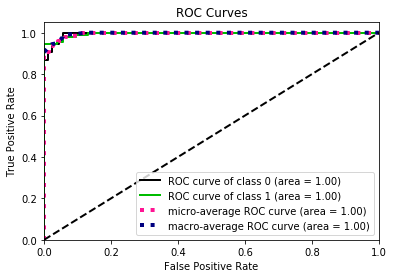

In [20]:
y_probas =  clf_logistic_best.predict_proba(X_test_holdout) # predicted probabilities generated by classifier
sckplt.metrics.plot_roc_curve(y_test_holdout, y_probas)
plt.show()

##### Lift Curve

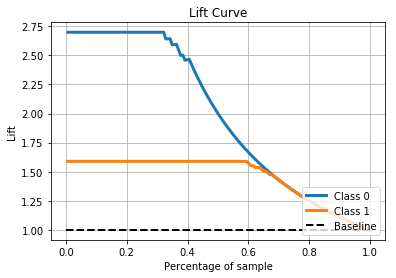

In [21]:
sckplt.metrics.plot_lift_curve(y_test_holdout, y_probas)
plt.show()

## KNN Classifier

##### Normalizing the input parameters

In [22]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [23]:
x_train_scaled = scaler.fit_transform(X_train)
x_train_scaled = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(X_test_holdout)
x_test_scaled = pd.DataFrame(x_test_scaled)

###### Tuning the model using GridSearch Cross Validation to find the values of hyperparameters that best fit the model

In [24]:
param_set ={'n_neighbors': list(range(1,30)), 'weights': ["uniform", "distance"]}

clf_knn = neighbors.KNeighborsClassifier()

grid_knn = GridSearchCV(clf_knn, param_grid = param_set, cv=5, scoring='recall')
grid_knn.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

##### examine the best model

In [25]:
# Single best score achieved across all params
print("Best score achieved across all parameters: ", grid_knn.best_score_)

# Dictionary containing the parameters used to generate that score
print(" ")
print("Best parameters")
print(grid_knn.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(" ")
print("Best estimator")
print(grid_knn.best_estimator_)

Best score achieved across all parameters:  0.9925148374523874
 
Best parameters
{'n_neighbors': 10, 'weights': 'distance'}
 
Best estimator
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance')


##### cross - validation with the best hyperparameters

In [26]:
clf_knn_best = grid_knn.best_estimator_

scores = cross_val_score(clf_knn_best, x_train_scaled, y_train, cv=10)

print("Below are the scores for each model run")
print(scores)

print(" ")
print("Mean Accuracy and variance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Below are the scores for each model run
[0.97674419 0.97674419 1.         1.         0.93023256 0.95348837
 0.95348837 0.97619048 1.         0.95121951]
 
Mean Accuracy and variance: 0.97 (+/- 0.05)


##### Fitting the Train data and Prediction on test data

In [27]:
clf_knn_best.fit(X_train,y_train)


y_pred = clf_knn_best.predict(X_test_holdout)

print("KNN : accuracy on test data is ",round(accuracy_score(y_test_holdout, y_pred)*100,2),"%")
print(" ")
print("KNN : Confusion Matrix")
print(" ")
print(confusion_matrix(y_test_holdout, y_pred))
print(" ")
print("KNN : Classification Report")
print(classification_report(y_test_holdout, y_pred))

KNN : accuracy on test data is  95.1 %
 
KNN : Confusion Matrix
 
[[48  5]
 [ 2 88]]
 
KNN : Classification Report
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        53
           1       0.95      0.98      0.96        90

   micro avg       0.95      0.95      0.95       143
   macro avg       0.95      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



##### ROC curve and Area Under the Curve

C:\Users\rckar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


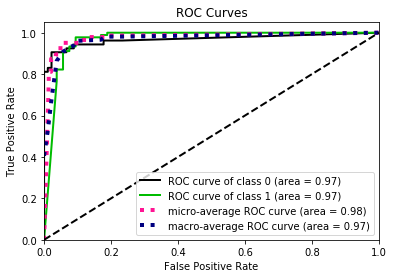

In [28]:
y_probas =  clf_knn_best.predict_proba(X_test_holdout) # predicted probabilities generated by classifier
sckplt.metrics.plot_roc_curve(y_test_holdout, y_probas)
plt.show()

##### Lift curve

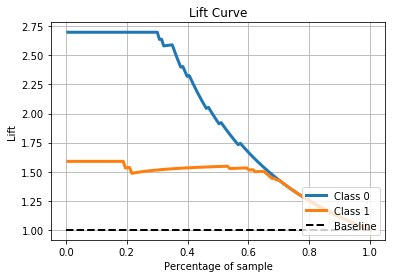

In [29]:
sckplt.metrics.plot_lift_curve(y_test_holdout, y_probas)
plt.show()

## SVM Classifier

###### Tuning the model using GridSearch Cross Validation to find the values of hyperparameters that best fit the model

In [30]:
# Hyper parameter tuning using GridSearch
param_set = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1,2,3,4,5,10,100]},
                    {'kernel': ['linear'], 'C': [1,2,3,5,10,100]}]
clf_SVC = svm.SVC(probability=True)
grid_SVC = GridSearchCV(clf_SVC, param_grid = param_set, cv=5, scoring='recall')
grid_SVC.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 2, 3, 4, 5, 10, 100]}, {'kernel': ['linear'], 'C': [1, 2, 3, 5, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

##### examine the best model

In [31]:
print("Best score achieved across all parameters: ", grid_SVC.best_score_)

# Dictionary containing the parameters used to generate that score
print(" ")
print("Best parameters")
print(grid_SVC.best_params_)

print(" ")
print("Best estimator")
print(grid_SVC.best_estimator_)

Best score achieved across all parameters:  0.9737354947293826
 
Best parameters
{'C': 5, 'kernel': 'linear'}
 
Best estimator
SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


##### cross - validation with the best hyperparameters

In [32]:
clf_SVC_best = grid_SVC.best_estimator_

scores = cross_val_score(clf_SVC_best, X_train, y_train, cv=5)

print("Below are the scores for each model run")
print(scores)

print(" ")
print("Mean Accuracy and variance: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Below are the scores for each model run
[0.95348837 0.96511628 0.94117647 0.94117647 0.96428571]
 
Mean Accuracy and variance: 0.95 (+/- 0.02)


##### Fitting the Train data and Prediction on test data

In [33]:
clf_SVC_best.fit(X_train,y_train)

y_pred = clf_SVC_best.predict(X_test_holdout)
print("SVC : accuracy on test data is ",round(accuracy_score(y_test_holdout, y_pred)*100,2),"%")
print(" ")
print("SVC : Confusion Matrix")
print(" ")
print(confusion_matrix(y_test_holdout, y_pred))
print(" ")
print("SVC : Classification Report")
print(classification_report(y_test_holdout, y_pred))

SVC : accuracy on test data is  95.1 %
 
SVC : Confusion Matrix
 
[[47  6]
 [ 1 89]]
 
SVC : Classification Report
              precision    recall  f1-score   support

           0       0.98      0.89      0.93        53
           1       0.94      0.99      0.96        90

   micro avg       0.95      0.95      0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



##### ROC curve and Area Under the Curve

C:\Users\rckar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


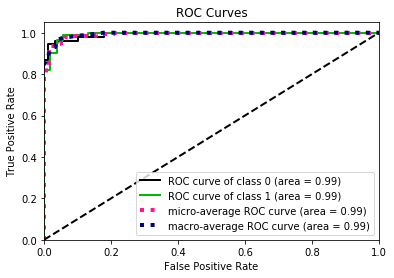

In [34]:
y_probas =  clf_SVC_best.predict_proba(X_test_holdout) # predicted probabilities generated by classifier
sckplt.metrics.plot_roc_curve(y_test_holdout, y_probas)
plt.show()

##### Lift curve

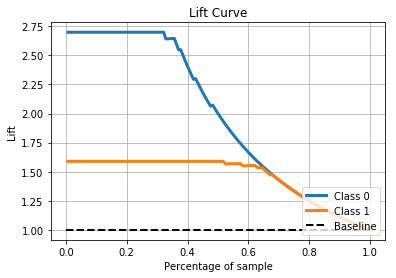

In [35]:
sckplt.metrics.plot_lift_curve(y_test_holdout, y_probas)
plt.show()